In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 60)

In [106]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [107]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [108]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [109]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Frequency')

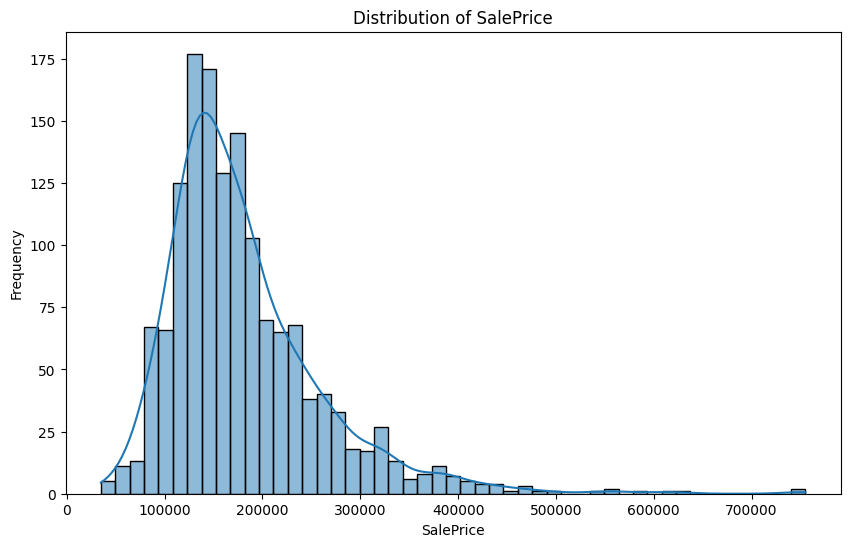

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

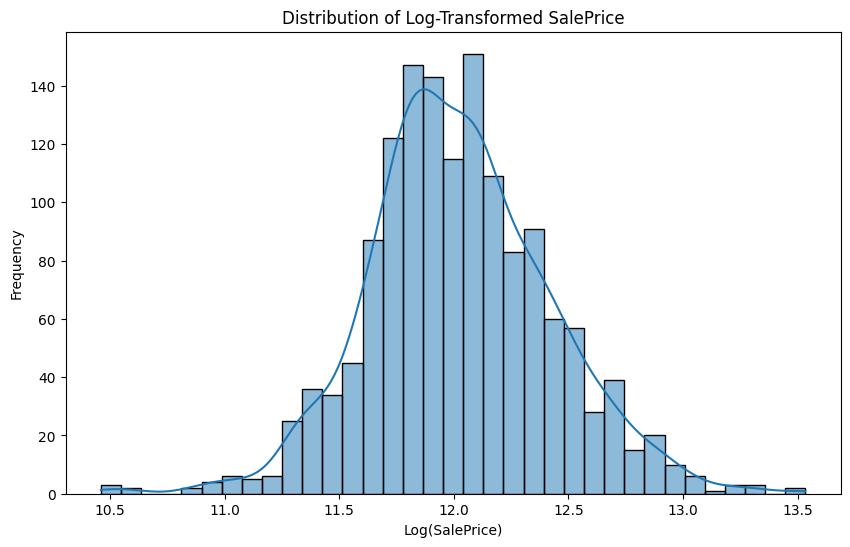

In [111]:
y_log = np.log1p(y)
plt.figure(figsize=(10, 6))
sns.histplot(y_log, kde=True)
plt.title('Distribution of Log-Transformed SalePrice')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')

In [112]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [115]:
print(f"Number of numerical features: {len(numerical_features)}")
print(f"Number of categorical features: {len(categorical_features)}")

Number of numerical features: 37
Number of categorical features: 43


In [116]:
numeric_df = df[numerical_features + ['SalePrice']]
correlation = numeric_df.corr()['SalePrice'].sort_values(ascending=False)
print("Top 10 features correlated with SalePrice:")
print(correlation[1:11])

Top 10 features correlated with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [119]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [120]:
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
], remainder='drop')

In [124]:
X = preprocessor.fit_transform(X)

In [125]:
X

array([[-1.73086488,  0.07337496, -0.22087509, ...,  0.        ,
         1.        ,  0.        ],
       [-1.7284922 , -0.87256276,  0.46031974, ...,  0.        ,
         1.        ,  0.        ],
       [-1.72611953,  0.07337496, -0.08463612, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.72611953,  0.30985939, -0.1754621 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.7284922 , -0.87256276, -0.08463612, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.73086488, -0.87256276,  0.23325479, ...,  0.        ,
         1.        ,  0.        ]])